# Establishig a class-specific probability filter #

Using the vaidation data and unknown data from the kraft et al (2022) dataset mixed in 50:50. we 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics
import numpy as np
import seaborn as sns

# Load Classified Data #
Data is split between two files: 
- `test-xception-57-class-non-merge.csv` - contains all of the probabilities for each class for each images
- `test-xception-57-fnames-non-merge-altered.csv` - image filenames and the manually annoated class

To get at accuracy, these dataframes need to be merged

In [2]:
df = pd.read_csv("../output/test-xception-54-class-non-merge.csv", index_col=0)
cols = df.columns
fnames = pd.read_csv("../output/test-xception-54-fnames-non-merge.csv")
df['fname'] = fnames['fname']
df['base'] = fnames['base']
df['class_name'] = fnames['class']

In [5]:
df_unclass = pd.read_csv("../output/nonclassified_output.csv")
df_unclass['class_name'] = "Unclassified"

Helper functions to combine the dataframes

In [6]:
def get_top_prob(row):
    return row[cols].max()

def get_top_class(row):
    ix = row[cols].values.argmax()
    return cols[ix]

In [7]:
df['top_prob'] = df.apply(get_top_prob,axis=1)
df['top_class'] = df.apply(get_top_class,axis=1)
df.head()

Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  Asterionellopsis  \
0  4.153765e-01         2.298859e-09     1.314894e-06      5.326898e-14   
1  2.904923e-10         1.139074e-13     1.104243e-18      2.342111e-16   
2  1.032494e-02         6.650661e-11     2.941094e-14      8.135995e-15   
3  1.328604e-09         2.212221e-06     7.848168e-10      1.879277e-16   
4  5.234969e-08         2.779777e-16     1.642622e-16      2.339979e-22   

    Boreadinium       Centric      Ceratium   Chaetoceros      Ciliates  \
0  7.230392e-06  1.803787e-08  4.175655e-05  3.850061e-10  1.058517e-03   
1  1.443602e-12  7.143029e-11  6.338852e-06  8.470342e-13  3.105029e-02   
2  5.607734e-04  7.955395e-08  6.890851e-06  8.878255e-15  5.666778e-08   
3  2.192105e-07  1.076219e-07  1.443577e-08  4.328154e-07  7.324255e-04   
4  1.685689e-12  1.508238e-11  4.581868e-10  5.270492e-13  4.860078e-08   

   Clusterflagellate  ...    Torodinium   Tropidoneis     Vicicitus  \
0       3.522679e-14  ...  1.451301e-08  1.713178e-11  2.392926e-13   
1       5.000919e-21  ...  1.008659e-03  2.626964e-13  3.137008e-24   
2       3.213174e-15  ...  9.015623e-08  3.023660e-15  1.277907e-16   
3       7.961562e-14  ...  8.929351e-08  1.590485e-07  2.393302e-16   
4       1.035079e-25  ...  5.876117e-09  4.669439e-14  1.720264e-24   

           cyst  zooplankton_misc  \
0  4.122278e-11          0.005865   
1  4.951952e-17          0.896081   
2  2.312974e-17          0.001303   
3  6.585256e-07          0.823983   
4  5.894281e-12          0.912619   

                                               fname  \
0  /hb/home/pcdaniel/ifcb-training/training-sorte...   
1  /hb/home/pcdaniel/ifcb-training/training-sorte...   
2  /hb/home/pcdaniel/ifcb-training/training-sorte...   
3  /hb/home/pcdaniel/ifcb-training/training-sorte...   
4  /hb/home/pcdaniel/ifcb-training/training-sorte...   

                                 base        class_name  top_prob  \
0  D20151111T222401_IFCB104_00032.png  zooplankton_misc  0.577366   
1  D20151111T223400_IFCB104_00824.png  zooplankton_misc  0.896081   
2  D20151111T224534_IFCB104_00848.png  zooplankton_misc  0.987219   
3  D20160623T015350_IFCB104_00208.png  zooplankton_misc  0.823983   
4  D20160623T020430_IFCB104_00133.png  zooplankton_misc  0.912619   

          top_class  
0           Tiarina  
1  zooplankton_misc  
2           Tiarina  
3  zooplankton_misc  
4  zooplankton_misc  

[5 rows x 59 columns]

In [8]:
df_unclass['top_prob'] = df.apply(get_top_prob,axis=1)
df_unclass['top_class'] = df.apply(get_top_class,axis=1)

In [10]:
df_unclass.head()

Unnamed: 0      Akashiwo  Alexandrium_singlet  Amy_Gony_Protoc  \
0           0  7.534111e-11         4.768337e-11     3.568783e-13   
1           1  2.150221e-10         2.663764e-11     9.403840e-14   
2           2  1.730539e-07         3.980675e-09     1.335187e-12   
3           3  1.065434e-09         1.099248e-08     5.264805e-12   
4           4  7.490167e-09         3.251339e-09     1.200273e-11   

   Asterionellopsis   Boreadinium       Centric      Ceratium   Chaetoceros  \
0      3.747611e-07  7.793696e-15  3.459551e-07  1.282503e-10  3.640017e-04   
1      4.880109e-10  2.102084e-16  1.175473e-08  5.051830e-12  4.016785e-08   
2      7.043933e-08  9.155092e-13  2.747593e-04  9.636247e-10  4.868842e-05   
3      2.288022e-07  5.111416e-12  1.752664e-07  5.037609e-11  1.770920e-06   
4      2.151793e-05  4.541893e-15  1.296774e-05  4.267945e-10  3.440376e-05   

       Ciliates  ...      Tontonia    Torodinium   Tropidoneis     Vicicitus  \
0  5.448891e-07  ...  8.271431e-11  2.221161e-11  7.576044e-15  1.190484e-14   
1  1.070085e-11  ...  1.853367e-12  6.700139e-15  8.530619e-18  1.402567e-16   
2  4.386767e-09  ...  1.249086e-10  3.028075e-11  3.952750e-12  1.184096e-11   
3  2.494752e-08  ...  4.294159e-11  1.773383e-11  1.832151e-12  4.091498e-13   
4  3.763749e-06  ...  8.338264e-12  9.020878e-10  2.681705e-14  1.219154e-13   

           cyst  zooplankton_misc                     fname    class_name  \
0  3.414254e-09          0.003699   Amylax_triacantha_1.png  Unclassified   
1  1.550573e-13          0.001082  Amylax_triacantha_10.png  Unclassified   
2  9.621168e-10          0.000203  Amylax_triacantha_11.png  Unclassified   
3  8.996490e-10          0.020006  Amylax_triacantha_12.png  Unclassified   
4  2.162191e-07          0.000072  Amylax_triacantha_13.png  Unclassified   

   top_prob         top_class  
0  0.577366           Tiarina  
1  0.896081  zooplankton_misc  
2  0.987219           Tiarina  
3  0.823983  zooplankton_misc  
4  0.912619  zooplankton_misc  

[5 rows x 59 columns]

__Ramp threshold from (.01 to .99) and recalculate accuracy at each step__

In [11]:
class_val = df['class_name'].values
class_top = df['top_class'].values
class_prob = df['top_prob'].values
thresh = np.arange(.0,1,0.01)
class_acc_all = np.zeros(len(thresh))
class_f = np.zeros(len(thresh))

In [12]:
for i, t in enumerate(thresh):
    new_class = np.copy(class_top)
    ixs = np.where(class_prob < t)
    new_class[ixs] = 'Unknown'
    class_acc_all[i] = sklearn.metrics.accuracy_score(class_val, new_class,normalize=True)
    class_f[i] = sklearn.metrics.f1_score(class_val, new_class, average="weighted")

__Plot Results__

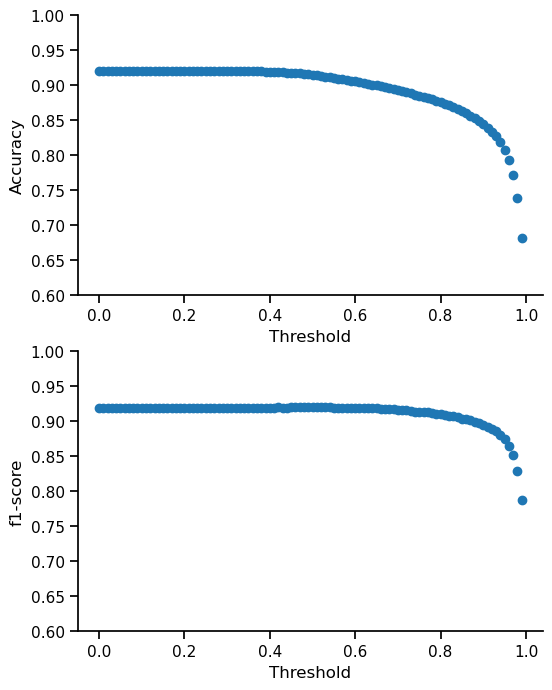

In [13]:
sns.set_context("notebook")

fig, (ax, ax2) = plt.subplots(2)
fig.set_size_inches(6,8)

ax.scatter(thresh, class_acc_all)
ax.set_xlabel("Threshold")
ax.set_ylabel("Accuracy")
ax.set_ylim(.6,1)

ax2.scatter(thresh, class_f)
ax2.set_xlabel("Threshold")
ax2.set_ylabel("f1-score")
ax2.set_ylim(.6,1)
sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_all.png", dpi=300, bbox_inches='tight')

## Calculate accuracy for each class ##

Store data in `class_acc` which should (57 x 100)

In [16]:
df_unclass.shape

(7694, 59)

In [32]:

thresh = np.arange(.0,1,0.01)
class_fscore = np.zeros((cols.shape[0],len(thresh))) # 54 x 100
class_recall = np.zeros((cols.shape[0],len(thresh))) # 54 x 100
class_acc = np.zeros((cols.shape[0],len(thresh))) # 54 x 100

for j, c in enumerate(cols):

    class_df = df.query("class_name == @c")

    if len(class_df) > len(df_unclass):
        class_df = class_df.sample(n=len(df_unclass))

    class_val = class_df['class_name'].values
    class_top = class_df['top_class'].values
    class_prob = class_df['top_prob'].values

    random_unclass = df_unclass.sample(n=len(class_df))
    rand_val = random_unclass['class_name'].values
    rand_top = random_unclass['top_class'].values
    rand_prob = random_unclass['top_prob'].values

    all_val = np.concatenate((class_val, rand_val))
    all_top = np.concatenate((class_top, rand_top))
    all_prob = np.concatenate((class_prob, rand_prob))


    for i, t in enumerate(thresh):
        new_class = np.copy(all_top)
        ixs = np.where(all_prob < t)
        new_class[ixs] = 'Unclassified'
        class_fscore[j,i] = sklearn.metrics.f1_score(all_val, new_class, average="weighted")
        class_acc[j,i] = sklearn.metrics.accuracy_score(all_val, new_class, normalize=True)
        class_recall[j,i] = sklearn.metrics.recall_score(all_val, new_class, average="weighted")

/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pcdaniel/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:

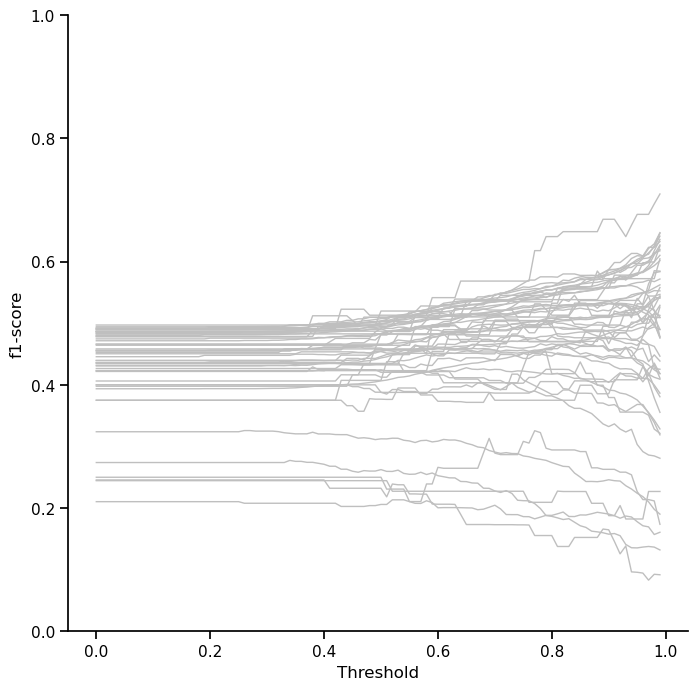

In [33]:
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in range(cols.shape[0]):
    ax.plot(thresh, class_fscore[k,:],color='.75',marker='None',lw=1)

# ax.plot(thresh, class_acc_all, marker='None',lw=3)
ax.set_xlabel("Threshold")
ax.set_ylabel("f1-score")
ax.set_ylim(0,1)

sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_byclass.png", dpi=300, bbox_inches='tight')

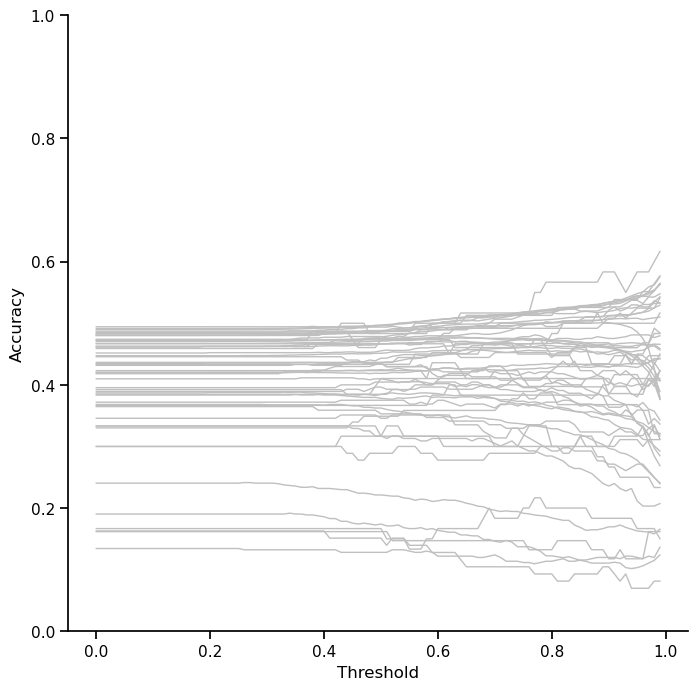

In [34]:
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in range(cols.shape[0]):
    ax.plot(thresh, class_acc[k,:],color='.75',marker='None',lw=1)

# ax.plot(thresh, class_acc_all, marker='None',lw=3)
ax.set_xlabel("Threshold")
ax.set_ylabel("Accuracy")
ax.set_ylim(0,1)

sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_byclass.png", dpi=300, bbox_inches='tight')

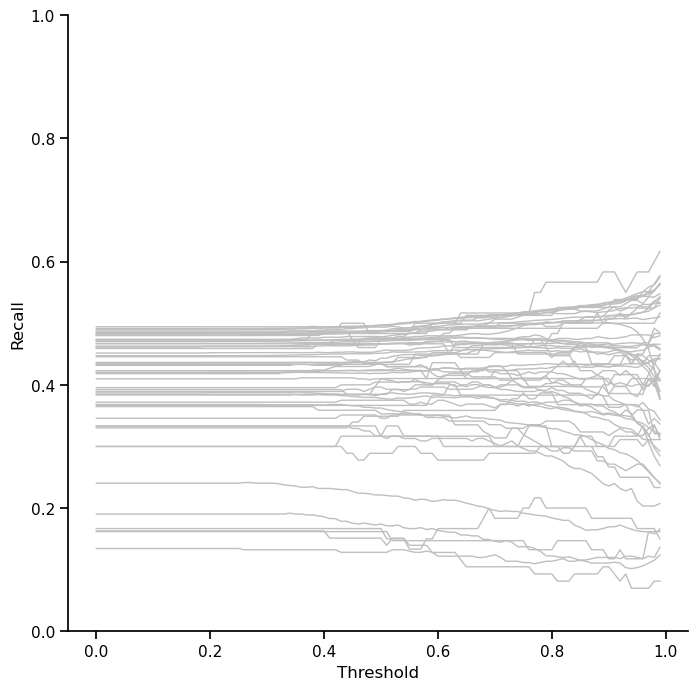

In [35]:
sns.set_context("notebook")

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in range(cols.shape[0]):
    ax.plot(thresh, class_recall[k,:],color='.75',marker='None',lw=1)

# ax.plot(thresh, class_acc_all, marker='None',lw=3)
ax.set_xlabel("Threshold")
ax.set_ylabel("Recall")
ax.set_ylim(0,1)

sns.despine()
# plt.savefig("../notebooks/figures/threshold_sensitivity_byclass.png", dpi=300, bbox_inches='tight')

In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# logits = np.array(np.linspace(0,50))
logits = np.random.normal(50,20,size=(50))
softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis=0, keepdims=True)

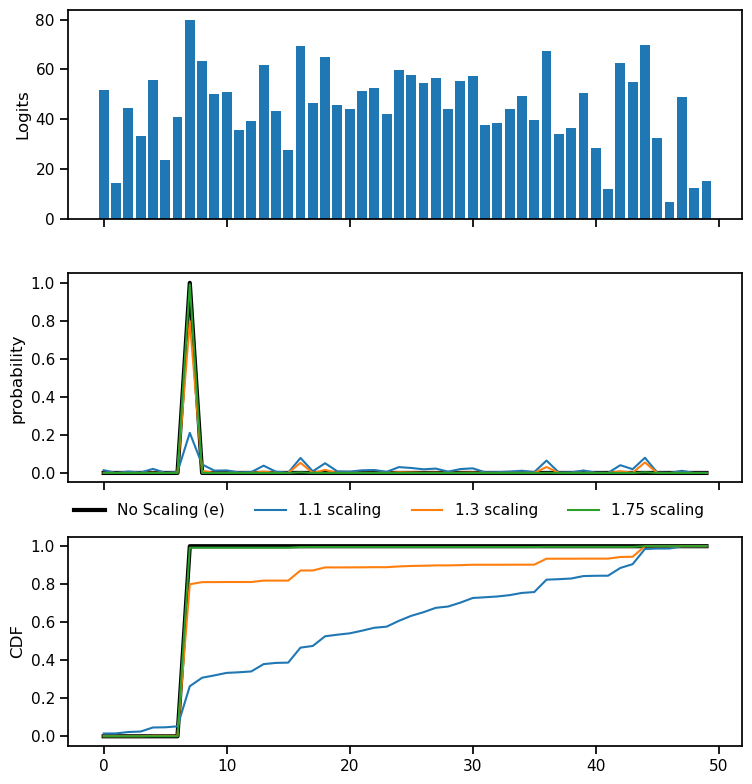

In [100]:
sns.set_context('notebook')
fig, (ax,ax2,ax3) = plt.subplots(3, sharex=True, )
fig.set_size_inches(8,8)
ax.bar(np.arange(0,50),logits)
ax.set_ylabel("Logits")
ax2.plot(np.arange(0,50), softmax, label='No Scaling (e)', lw=3,color='k')
cdf = np.cumsum(softmax)
ax3.plot(np.arange(0,50), cdf, label="No Scaling (e)", lw=3,color='k')

for scale in [1.1,1.3,1.75]:
    logits_cooled = logits * np.log(scale)
    softmax_cooled = tf.exp(logits_cooled) / tf.reduce_sum(tf.exp(logits_cooled), axis=0, keepdims=True)
    ax2.plot(np.arange(0,50), softmax_cooled, label='{} scaling'.format(scale))
    cdf = np.cumsum(softmax_cooled)
    ax3.plot(np.arange(0,50), cdf, label="{}".format(scale))


ax2.legend(frameon=False, ncol=4, loc=(0,-.2))
# ax3.legend(frameon=False)
ax2.set_ylabel("probability")
ax3.set_ylabel('CDF')
fig.tight_layout()

plt.savefig("./figures/softmax-scaling-example.png", dpi=300,)

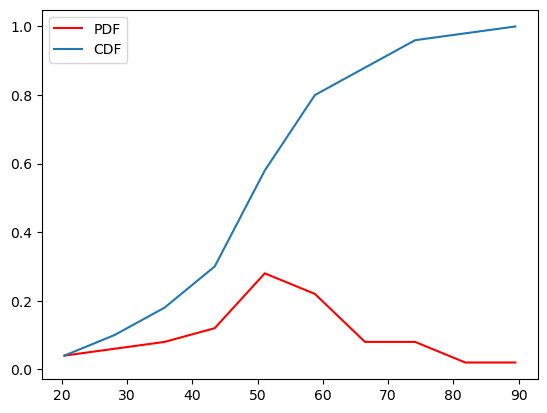

In [63]:
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

In [71]:
import configparser
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import mixed_precision


In [73]:
base_model = Xception(
        weights='imagenet',
        include_top=False,
        pooling='avg'
    )

# Add new fully connected layers for ifcb
# dense layer to classify with softmax
model_output = base_model.output
model_output = Dense(1024, activation='relu')(model_output)
model_output = base_model.output

softmax_scale = 1.3
number_of_classes = 54

if softmax_scale is not None:
    model_output = Lambda(lambda x: x * np.log(float(softmax_scale)))(model_output)

model_output = Dense(number_of_classes, activation='softmax')(model_output) # Note this has to be the number of the labels in the dataset
model = Model(inputs=base_model.input, outputs=model_output)

# Only train the dense layers, user transfer learning for the rest
for layer in model.layers[:-2]:
    layer.trainable = False
for layer in model.layers[-2::]:
    layer.trainable = True

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy', tf.keras.metrics.AUC()],
)



In [78]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f0274519d90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f02745b2130> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0274519a60> False
<keras.layers.core.activation.Activation object at 0x7f027c066df0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f027c0654c0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0277f9e8b0> False
<keras.layers.core.activation.Activation object at 0x7f0274530df0> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f02744da280> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f02744f5b50> False
<keras.layers.core.activation.Activation object at 0x7f0274499400> False
<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x7f02744da430> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f